# Importing Libraries 

In [35]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
np.random.seed(42)

# Introduction

The data that we are going to use is all about what factors affecting student's scores in math, reading, and writing.

You can dowload the data in these sites: https://www.kaggle.com/spscientist/students-performance-in-exams or http://roycekimmons.com/tools/generated_data/exams

Features: 
- "gender": M or F 
- "race/ethnicity": Race of the student
- "parental level of education: Student's parent level of education
- "lunch": What kind of lunch did student take
- "test prepartion course": Did the student took a test preparation course
- "math score": Scores in Math 
- "reading score": Scores in Reading 
- "writing score": Scores in Writing

In this notebook we will explore what factors will affect student's scores in various subject.

## Loading the Data

In [36]:
df = pd.read_csv("../Data/StudentsPerformance.csv")

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


No missing values therefore, we can proceed smoothly in our analysis.

Let's check the unique values in parental level of education and in race/ethnicity.

In [39]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [40]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

There are six unique values in parental level of education, you can group these into same category but for this analysis we let the features stay the same, while in race/ethnicity column there are five unique values.

In [41]:
df[["math score", "reading score", "writing score"]].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploratory Data Analysis

In [42]:
passing_score = 75
df["MathScorePass"] = np.where(df["math score"] < passing_score,
                              "Fail",
                              "Pass")
df["ReadingScorePass"] = np.where(df["reading score"] < passing_score,
                                 "Fail",
                                 "Pass")
df["WritingScorePass"] = np.where(df["writing score"] < passing_score,
                                "Fail", 
                                "Pass")


I set a threshold of 75 for passing grade I based this value to our educational system. You can set this into your own value of passing grade. 

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,MathScorePass,ReadingScorePass,WritingScorePass
0,female,group B,bachelor's degree,standard,none,72,72,74,Fail,Fail,Fail
1,female,group C,some college,standard,completed,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Fail,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass


In [44]:
def get_count_plot(x,
                  hue,
                  data,
                  palette,
                  title): 
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    ax.tick_params(labelsize=16)
    ax.set_title(title)
    sns.countplot(x=x, hue=hue, data=data, palette=palette, ax=ax);    
    
def get_scatter_plot(x, 
                     y,
                    hue,
                    data,
                    palette,
                    title): 
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    ax.tick_params(labelsize=16)
    ax.set_title(title)
    sns.stripplot(x=x, y=y, hue=hue, data=data, palette=palette, ax=ax, alpha=0.75)
    
def get_point_plot(x,
                  y,
                  hue,
                  data,
                  palette,
                  title,
                  markers=["o", "x"],
                  linestyle=["-", "--"],
                  ):
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    ax.tick_params(labelsize=16)
    ax.set_title(title)
    sns.pointplot(x=x, y=y, hue=hue, data=data, palette=palette, markers=markers, linestyle=linestyle, ax=ax)

We created three functions for plotting, for us to visualize and understand the data more.

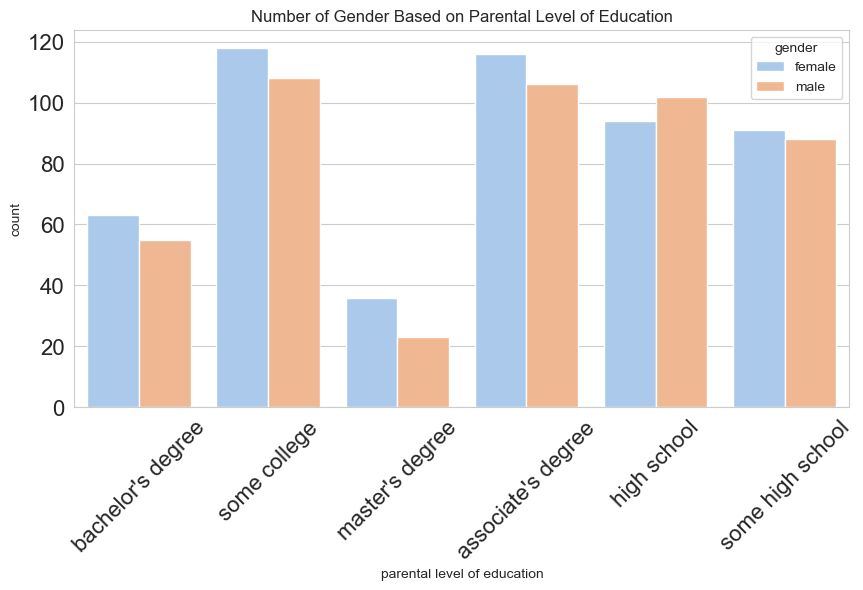

In [45]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
ax.tick_params(labelsize=16)
ax.set_title("Number of Gender Based on Parental Level of Education")
sns.countplot(x="parental level of education",
             hue="gender",
             data=df,
             palette="pastel",
             ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

The number of samples in bachelor's degree and master's degree are low it can affect the analysis later if we relate the parental level of education to the exam scores.

The number of samples here may be affected by their status, only handful can afford a bachelor's degree and master's degree. 

There are more females than male in most aspect except in high school.


In [46]:
df[df['test preparation course'] == 'completed']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,MathScorePass,ReadingScorePass,WritingScorePass
1,female,group C,some college,standard,completed,69,90,88,Fail,Pass,Pass
6,female,group B,some college,standard,completed,88,95,92,Pass,Pass,Pass
8,male,group D,high school,free/reduced,completed,64,64,67,Fail,Fail,Fail
13,male,group A,some college,standard,completed,78,72,70,Pass,Fail,Fail
18,male,group C,master's degree,free/reduced,completed,46,42,46,Fail,Fail,Fail
...,...,...,...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86,81,75,Pass,Pass,Pass
991,female,group B,some high school,standard,completed,65,82,78,Fail,Pass,Pass
995,female,group E,master's degree,standard,completed,88,99,95,Pass,Pass,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,Fail,Fail,Fail


There were 358 who took the test preparation course

## Grade Based on Gender

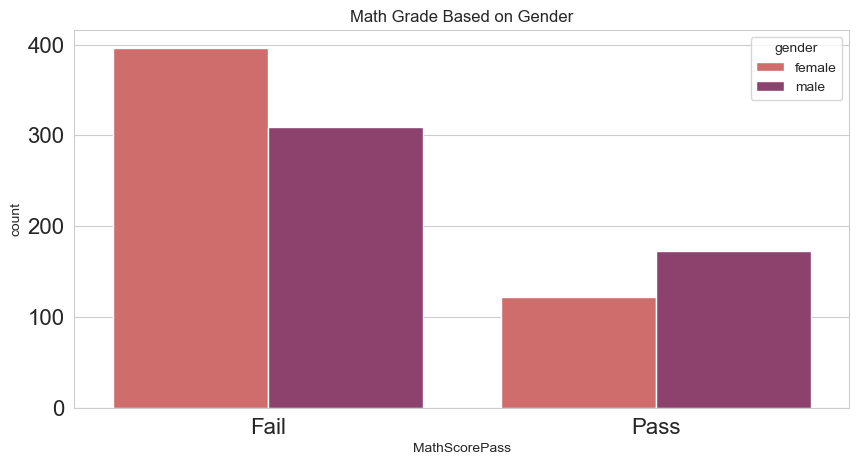

In [47]:
get_count_plot(x="MathScorePass",
              hue="gender",
              data=df,
              palette="flare",
              title="Math Grade Based on Gender")
    

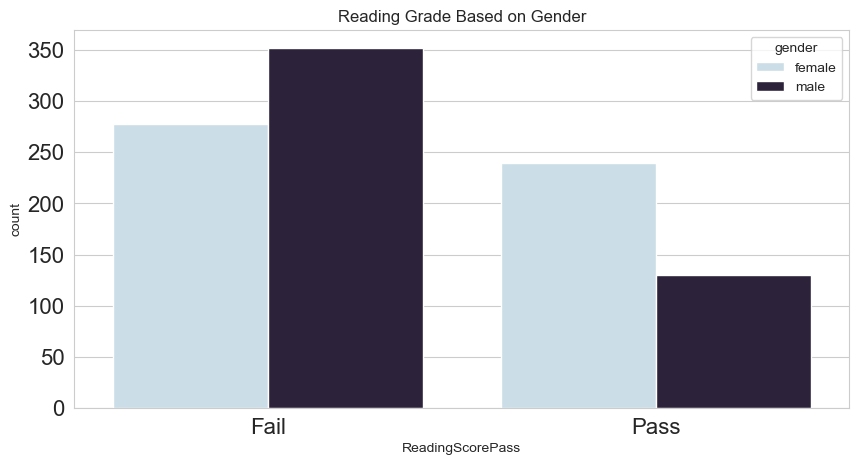

In [48]:
get_count_plot(x="ReadingScorePass",
              hue="gender",
              data=df,
              palette="ch:s=.25,rot=-.25",
              title="Reading Grade Based on Gender")

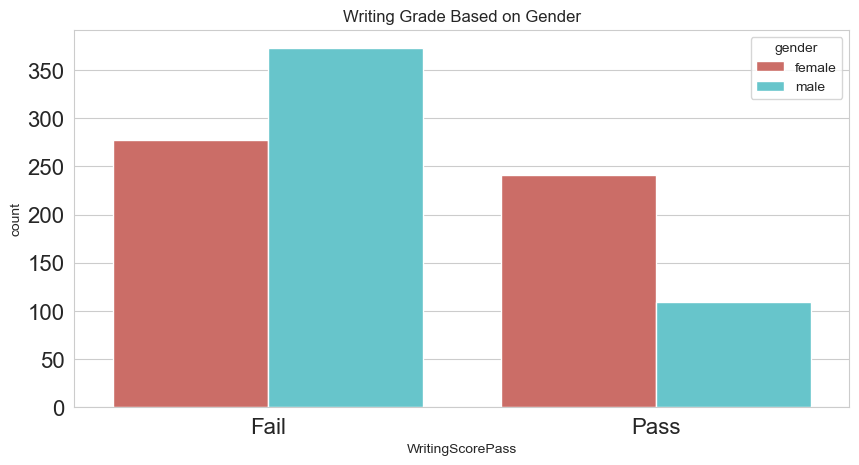

In [49]:
get_count_plot(x="WritingScorePass",
              hue="gender",
              data=df,
              palette="hls",
              title="Writing Grade Based on Gender")

In Math subject, most who failed was female, we can conclude that in this data male was superior in Math subject than female.

But in Reading and Writing scores, female beat the male. We can conclude that in this data set male was not good at reading and writing. 

## Grade based on Race/Ethnicity

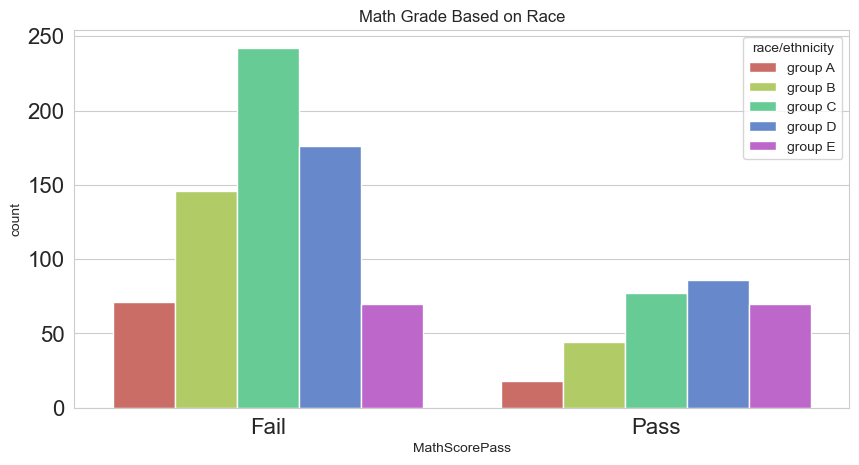

In [50]:
get_count_plot(x="MathScorePass",
              hue=df["race/ethnicity"].sort_values(ascending=True),
              data=df,
              palette="hls",
              title="Math Grade Based on Race")

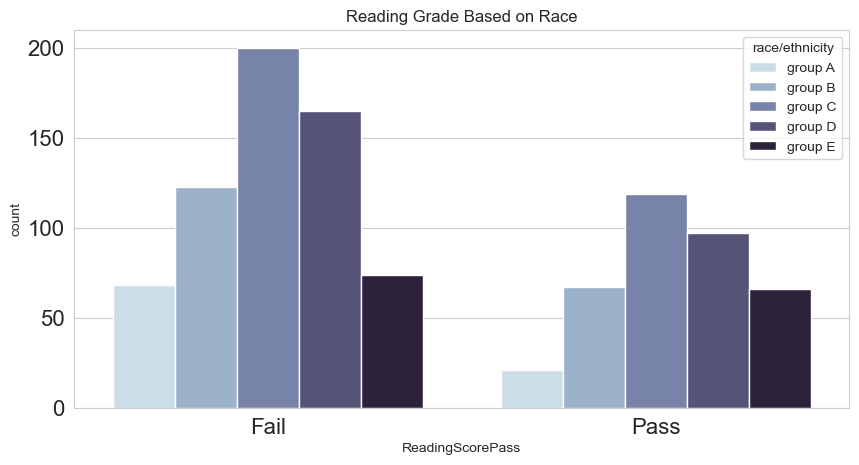

In [51]:
get_count_plot(x="ReadingScorePass",
              hue=df["race/ethnicity"].sort_values(ascending=True),
              data=df,
              palette="ch:s=.25,rot=-.25",
              title="Reading Grade Based on Race")

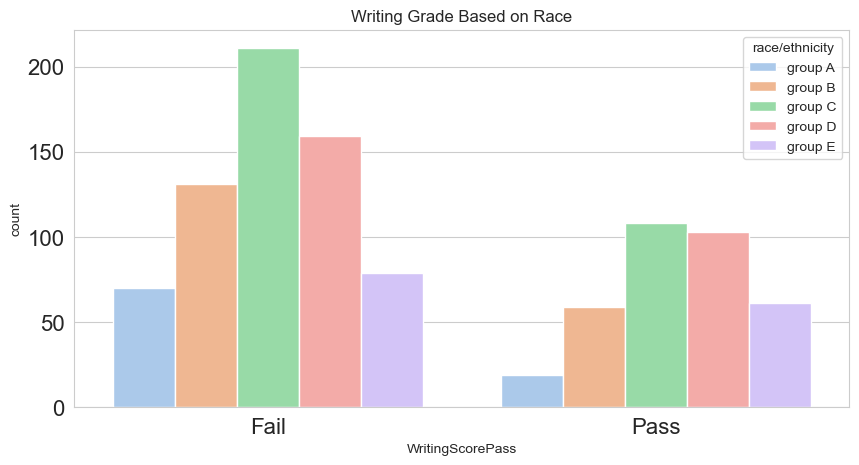

In [52]:
get_count_plot(x="WritingScorePass",
              hue=df["race/ethnicity"].sort_values(ascending=True),
              data=df,
              palette="pastel",
              title="Writing Grade Based on Race")

In all of the subjects, Group C was the one who failed the most but also who passed the most in Reading and Writing subject. I infer that there are more samples of female in Group C since there are less student in Group C who passed in Math subject.

I think students whose parents level of education are Bachelor's degree and Master's degree fall into Group A and Group E since there are low samples in that area. 

## Grade Based on Parental Level of Education

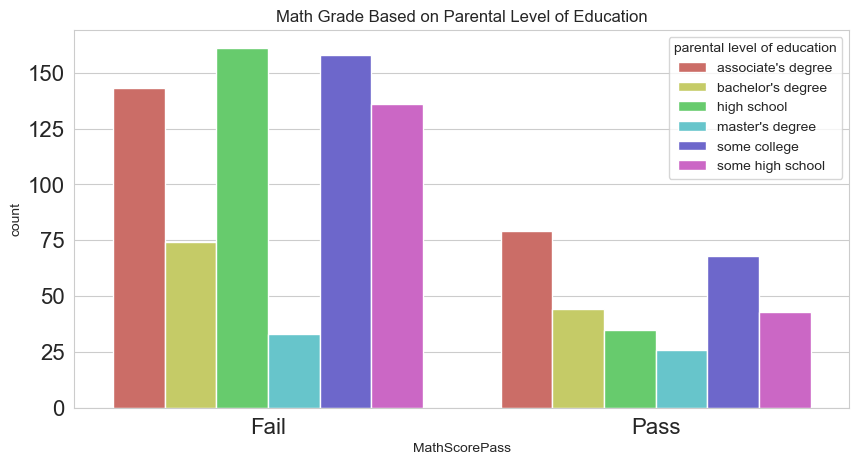

In [53]:
get_count_plot(x="MathScorePass",
              hue=df["parental level of education"].sort_values(ascending=True),
              data=df,
              palette="hls",
              title="Math Grade Based on Parental Level of Education")

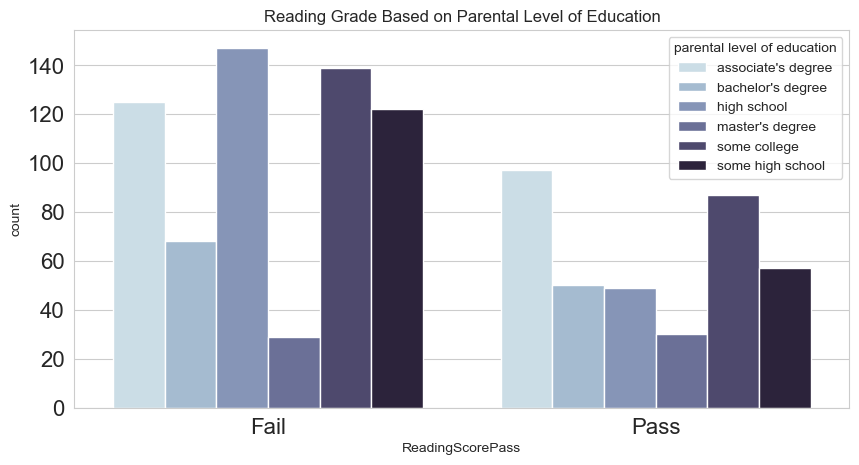

In [54]:
get_count_plot(x="ReadingScorePass",
              hue=df["parental level of education"].sort_values(ascending=True),
              data=df,
              palette="ch:s=.25,rot=-.25",
              title="Reading Grade Based on Parental Level of Education")

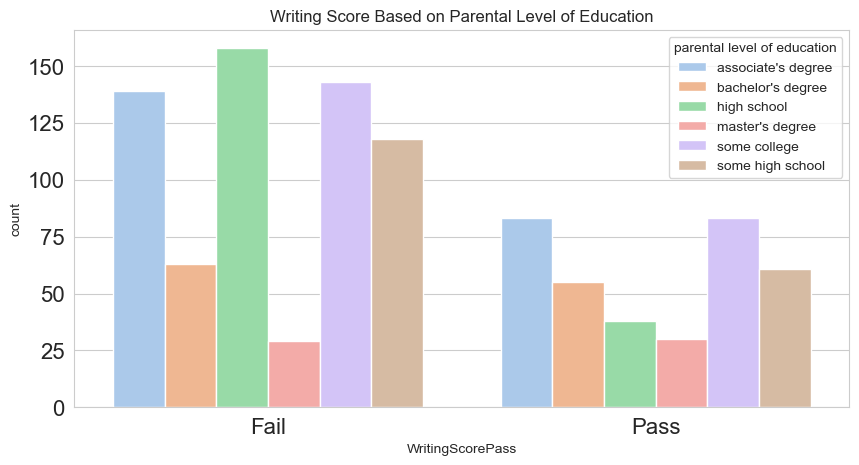

In [55]:
get_count_plot(x="WritingScorePass",
              hue=df["parental level of education"].sort_values(ascending=True),
              data=df,
              palette="pastel",
              title="Writing Score Based on Parental Level of Education")

Students whose parents level of education are Associate's Degree and Some College have more number of students who pass in all of the subject. We can't still conclude that students in that area are more better than the students whose parents have bachelor's degree or master's degree since we have a low number of sample in that area. 

## Grade Based on Lunch 

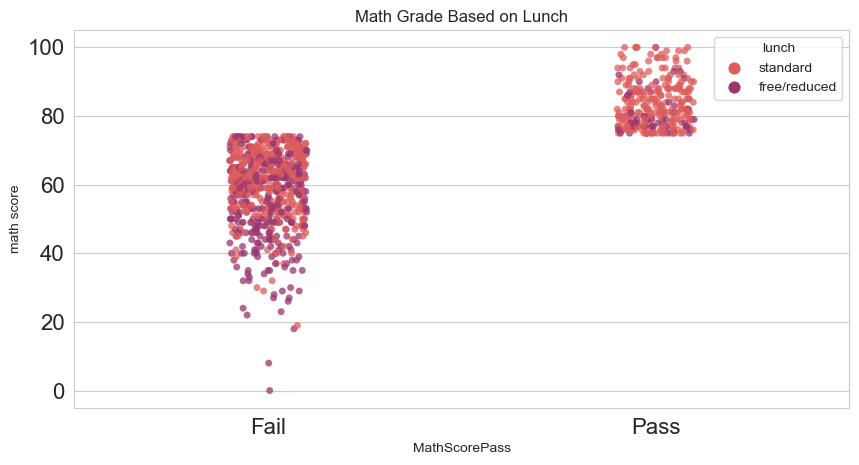

In [56]:
get_scatter_plot(x='MathScorePass', 
                 y='math score', 
                 hue='lunch',
                data=df,
                palette='flare',
                title='Math Grade Based on Lunch')

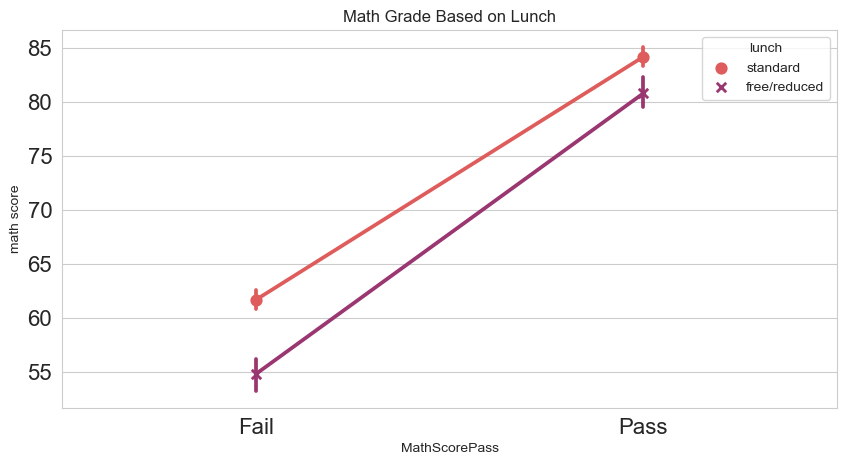

In [57]:
get_point_plot(x='MathScorePass',
              y='math score',
              hue='lunch',
              data=df,
              palette='flare',
              title='Math Grade Based on Lunch')

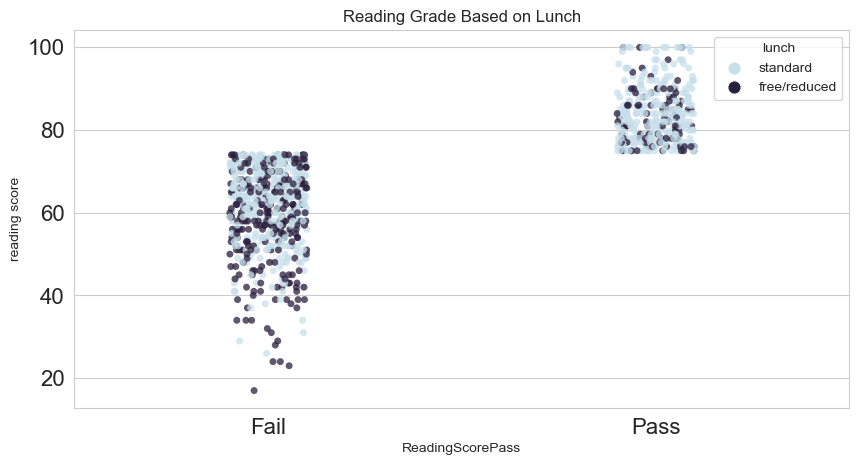

In [58]:
get_scatter_plot(x='ReadingScorePass', 
                 y='reading score', 
                 hue='lunch',
                data=df,
                palette='ch:s=.25,rot=-.25',
                title='Reading Grade Based on Lunch')

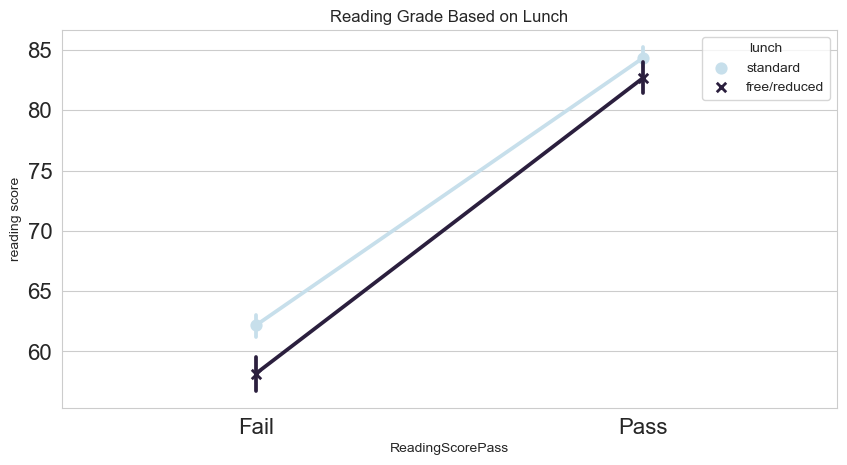

In [59]:
get_point_plot(x='ReadingScorePass',
              y='reading score',
              hue='lunch',
              data=df,
              palette='ch:s=.25,rot=-.25',
              title='Reading Grade Based on Lunch')

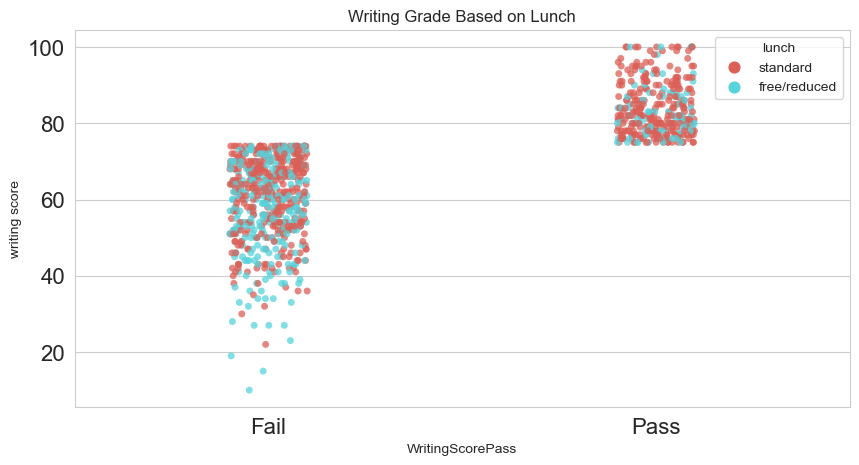

In [60]:
get_scatter_plot(x='WritingScorePass', 
                 y='writing score', 
                 hue='lunch',
                data=df,
                palette='hls',
                title='Writing Grade Based on Lunch')

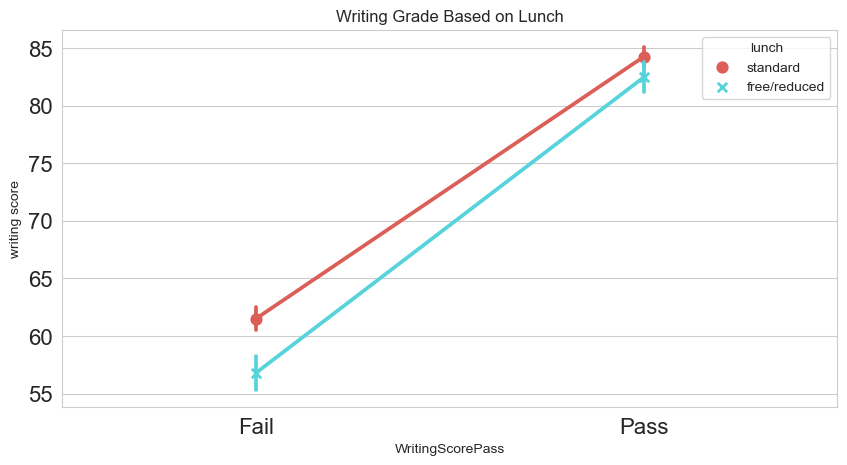

In [61]:
get_point_plot(x='WritingScorePass',
              y='writing score',
              hue='lunch',
              data=df,
              palette='hls',
              title='Writing Grade Based on Lunch')

Students who got standard lunch have more chance of passing in all of the subject.

## Grade Based on Test Preparation

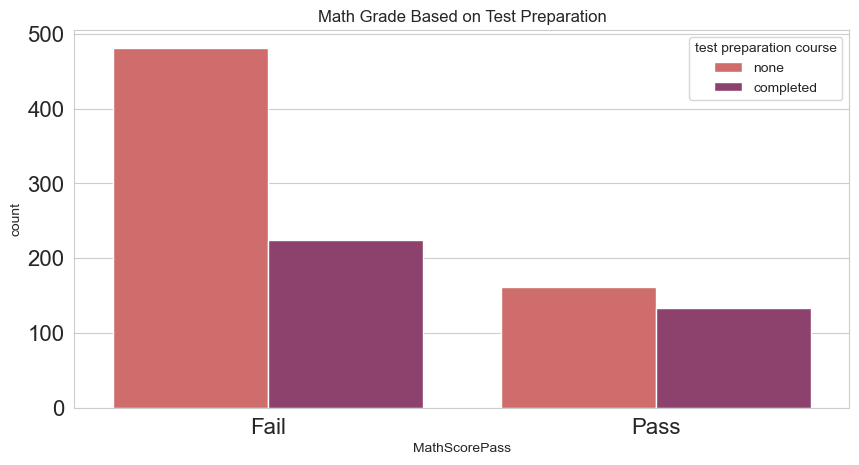

In [62]:
get_count_plot(x='MathScorePass', 
               hue='test preparation course',
               data=df,
               palette='flare',
               title='Math Grade Based on Test Preparation')

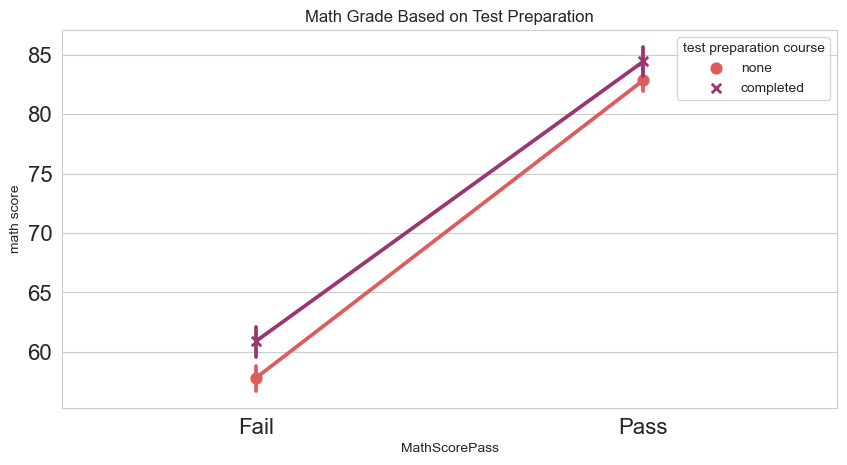

In [63]:
get_point_plot(x='MathScorePass',
              y='math score',
              hue='test preparation course',
              data=df,
              palette='flare',
              title='Math Grade Based on Test Preparation')

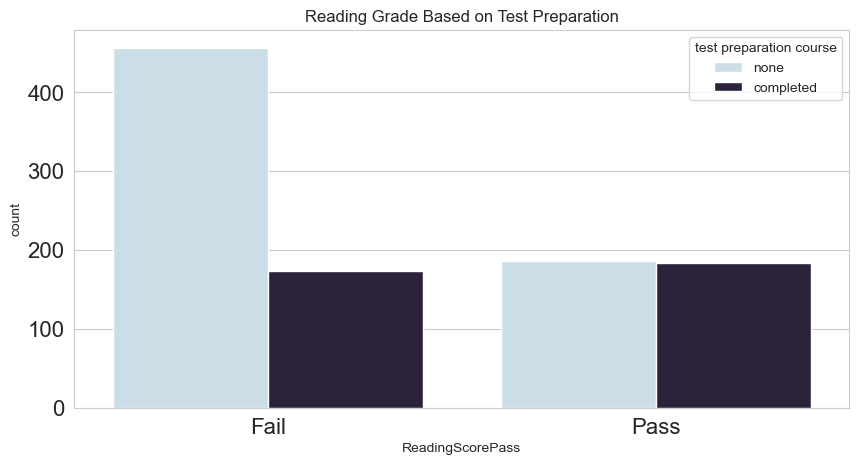

In [64]:
get_count_plot(x='ReadingScorePass', 
               hue='test preparation course',
               data=df,
               palette='ch:s=.25,rot=-.25',
               title='Reading Grade Based on Test Preparation')

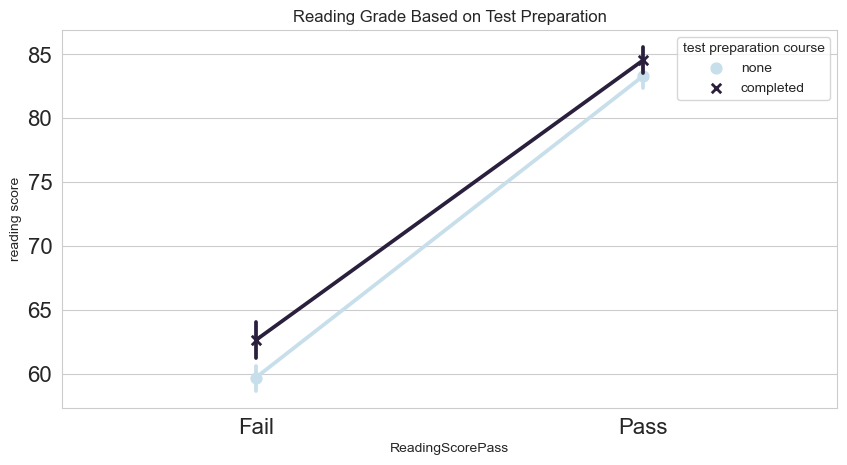

In [65]:
get_point_plot(x='ReadingScorePass',
              y='reading score',
              hue='test preparation course',
              data=df,
              palette='ch:s=.25,rot=-.25',
              title='Reading Grade Based on Test Preparation')

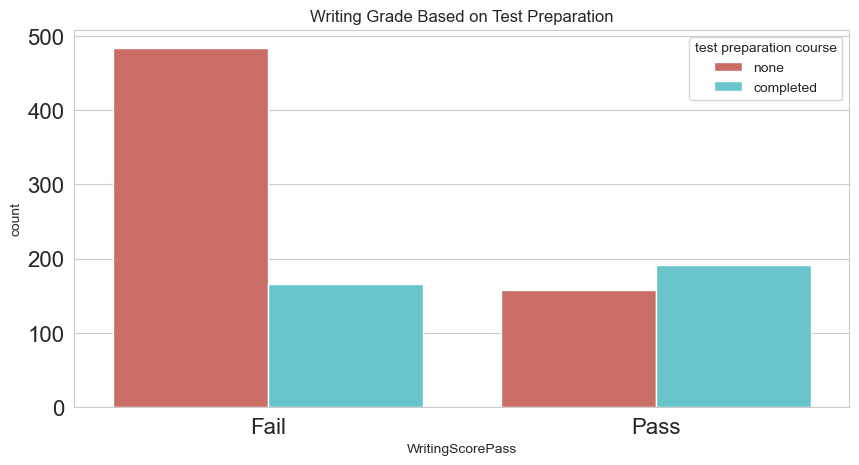

In [66]:
get_count_plot(x='WritingScorePass', 
               hue='test preparation course',
               data=df,
               palette='hls',
               title='Writing Grade Based on Test Preparation')

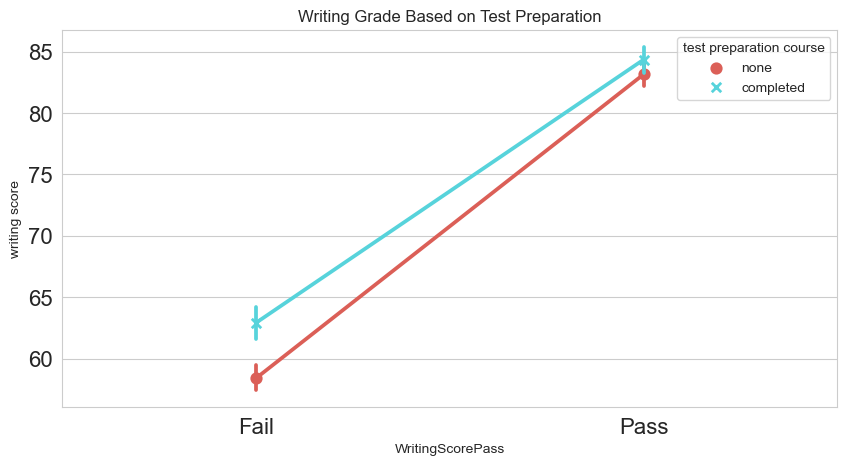

In [67]:
get_point_plot(x='WritingScorePass',
              y='writing score',
              hue='test preparation course',
              data=df,
              palette='hls',
              title='Writing Grade Based on Test Preparation')

Test preparation course is only effective in Writing and Reading subject, but in Math there is no signficant value since most who pass are students who don't take the test preparation course. 

# Summary of Analysis

- Male is better than Math, and female is better than Reading and Writing 
- Group C in race/ethnicity column has more students fail in all area but also has more students pass in Reading and Writing
- The kind of lunch that the student take has an affect on performance in exams
- Test preparation course is only effective in Writing and Reading subject

Still, there are a lot of factors affecting the performance of student in an exam: Sleep quality, Hours of studying, Kind of Studying, and a lot more. 

We still need more information to better analyze the peformance of a student in an exam. 